# Image retrieval using deep features

In [2]:
import turicreate

# Load some CIFAR-10 images

In [18]:
image_data = turicreate.SFrame('image_train_data/')
image_test = turicreate.SFrame('image_test_data/')

In [25]:
def get_data(name):
    return image_test.filter_by(name,'label')

In [7]:
sketch = turicreate.Sketch(image_data['label'])
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [10]:
dog = get_data('dog')
bird = get_data('bird')
automobile = get_data('automobile')
cat = get_data('cat')

In [ ]:
image_data['image'].explore()

# Compute deep features from our images

In [ ]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_data['deep_features'] = deep_learning_model.extract_features(image_data)

In [ ]:
image_data

# Create a nearest neighbors model to retrieve images from deep features

In [11]:
cat_model = turicreate.nearest_neighbors.create(cat,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [12]:
dog_model = turicreate.nearest_neighbors.create(dog,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [29]:
automobile_model = turicreate.nearest_neighbors.create(automobile,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [30]:
bird_model = turicreate.nearest_neighbors.create(bird,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

# Use image retrieval model with deep features to find similar images

In [ ]:
cat = image_data[18:19]

In [ ]:
cat['image'].explore()

In [16]:
cat[cat['id']==33]

Columns:
	id	int
	image	Image
	label	str
	deep_features	array
	image_array	array

Rows: 1

Data:
+----+----------------------+-------+-------------------------------+
| id |        image         | label |         deep_features         |
+----+----------------------+-------+-------------------------------+
| 33 | Height: 32 Width: 32 |  cat  | [0.5250879526138306, 0.0, ... |
+----+----------------------+-------+-------------------------------+
+-------------------------------+
|          image_array          |
+-------------------------------+
| [7.0, 5.0, 8.0, 7.0, 5.0, ... |
+-------------------------------+
[1 rows x 5 columns]

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 11.453ms     |

| Done         |         | 100         | 73.912ms     |

+--------------+---------+-------------+--------------+


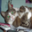
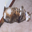
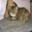
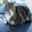
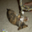

In [70]:
cat_neighbors = get_images_from_ids(cat_model.query(image_test[0:1]))
cat_neighbors['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 13.6ms       |

| Done         |         | 100         | 113.914ms    |

+--------------+---------+-------------+--------------+


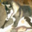
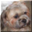
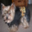
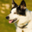
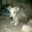

In [71]:
dog_neighbors = get_images_from_ids(dog_model.query(image_test[0:1]))
dog_neighbors['image'].explore()

In [23]:
dog_neighbors['distance'].mean()

37.77071136184157

In [24]:
cat_neighbors['distance'].mean()

36.15573070978294

In [26]:
image_test_cat, image_test_dog, image_test_bird, image_test_automobile=get_data('cat'),get_data('dog'),get_data('bird'),get_data('automobile')

In [36]:
dog_cat_neighbors = cat_model.query(image_test_dog, k=1)
dog_automobile_neighbors = automobile_model.query(image_test_dog, k=1)
dog_bird_neighbors = bird_model.query(image_test_dog, k=1)
dog_dog_neighbors = dog_model.query(image_test_dog, k=1)


Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 793.993ms    |

| Done         | 509000  | 100         | 903.623ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 760.095ms    |

| Done         | 509000  | 100         | 837.678ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 60000   | 12.5523     | 668.653ms    |

| Done         | 478000  | 100         | 755.203ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 889.684ms    |

| Done         | 509000  | 100         | 977.889ms    |

+--------------+---------+-------------+--------------+

In [37]:
dog_dog_neighbors

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 1000

Data:
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |      49803      | 33.47735903726335  |  1   |
|      1      |       5755      | 32.84584956840554  |  1   |
|      2      |      20715      | 35.03970731890584  |  1   |
|      3      |      13387      | 33.90103276968193  |  1   |
|      4      |      12089      | 37.484925090925636 |  1   |
|      5      |       6094      | 34.94516534398124  |  1   |
|      6      |       3431      | 39.095727834463545 |  1   |
|      7      |       6184      | 37.76961310322034  |  1   |
|      8      |       2167      | 35.10891446032838  |  1   |
|      9      |       7776      | 43.242283258453455 |  1   |
+-------------+-----------------+--------------------+------+
[1000 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [44]:
dog_distances = turicreate.SFrame()
dog_distances["dog-dog"] =dog_dog_neighbors["distance"]

dog_distances["dog-cat"] = dog_cat_neighbors["distance"]

dog_distances["dog-automobile"] = dog_automobile_neighbors["distance"]

dog_distances["dog-bird"] = dog_bird_neighbors["distance"]
dog_distances

Columns:
	dog-dog	float
	dog-cat	float
	dog-automobile	float
	dog-bird	float

Rows: 1000

Data:
+--------------------+--------------------+--------------------+
|      dog-dog       |      dog-cat       |   dog-automobile   |
+--------------------+--------------------+--------------------+
| 33.47735903726335  | 36.419607706754384 | 41.95797614571203  |
| 32.84584956840554  | 38.83532688735542  | 46.00213318067788  |
| 35.03970731890584  | 36.97634108541546  | 42.946229069238804 |
| 33.90103276968193  | 34.575007291446106 | 41.68660600484793  |
| 37.484925090925636 | 34.77882479101661  | 39.22696649347584  |
| 34.94516534398124  | 35.11715782924591  | 40.58451176980721  |
| 39.095727834463545 | 40.60958309132649  | 45.10673529610854  |
| 37.76961310322034  | 39.90368673062214  | 41.32211409739762  |
| 35.10891446032838  | 38.067470016821176 | 41.82446549950164  |
| 43.242283258453455 | 42.72587329506032  | 45.497692940110376 |
+--------------------+--------------------+--------------------+
+--------------------+
|      dog-bird      |
+--------------------+
| 41.75386473035126  |
|  41.3382958924861  |
| 38.615759085289056 |
| 37.08922699538214  |
| 38.27228869398105  |
| 39.146208923590486 |
| 40.523040105962316 |
| 38.19479183926956  |
| 40.156713166131446 |
| 45.55979626027668  |
+--------------------+
[1000 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [45]:
def is_dog_correct(row):
    if(row['dog-dog']<row['dog-cat'] and row['dog-dog']<row['dog-bird'] and row['dog-dog']<row['dog-automobile'] ):
        return 1
    else:
        return 0

In [51]:
dog_distances['correct'] = dog_distances.apply(is_dog_correct)

In [55]:
dog_distances['correct'].sum()


678

In [66]:
def get_images_from_ids(query_result):
    return image_data.filter_by(query_result['reference_label'],'id')

In [ ]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

In [ ]:
cat_neighbors['image'].explore()

# Find images similar to a car

In [ ]:
car = image_data[8:9]

In [ ]:
car['image'].explore()

In [ ]:
get_images_from_ids(knn_model.query(car))['image'].explore()

# Create a lambda function to find and show nearest neighbors to an image

In [65]:
show_neighbors = lambda i: get_images_from_ids(knn_model.query(image_data[i:i+1]))['image'].explore()

In [ ]:
show_neighbors(8)

In [ ]:
show_neighbors(26)

In [ ]:
show_neighbors(500)